In [161]:
import pandas
import sklearn
import numpy as np
from sklearn.metrics import accuracy_score

In [162]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
from sklearn.model_selection import GroupKFold

In [164]:
X=np.loadtxt('/Users/samweisenthal/Downloads/UCI HAR Dataset/train/X_train.txt')

In [165]:
y=np.loadtxt('/Users/samweisenthal/Downloads/UCI HAR Dataset/train/y_train.txt')

In [166]:
s=np.loadtxt('/Users/samweisenthal/Downloads/UCI HAR Dataset/train/subject_train.txt')

In [167]:
groups = s

In [168]:
gkf = GroupKFold(n_splits=5)

gkf.split(X, y, groups=groups)

f = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, 
                           min_weight_fraction_leaf=0.0, max_features='auto', 
                           max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False, 
                           n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)

imps = []
mods = []
for train,test in gkf.split(X, y, groups=groups):
    f.fit(X[train],y[train])
    print accuracy_score(f.predict(X[test]),y[test])
    imps.append(f.feature_importances_)
    print f.feature_importances_[f.feature_importances_.argsort()[::-1]]
    

0.830985915493
[  4.35873228e-02   4.23334741e-02   3.42129648e-02   3.39342129e-02
   3.07189616e-02   2.66993598e-02   2.55488085e-02   2.23257770e-02
   2.19368904e-02   2.15060356e-02   2.12132701e-02   2.11448193e-02
   2.08855090e-02   2.03181593e-02   2.00792929e-02   2.00357521e-02
   1.99822469e-02   1.99530255e-02   1.99500660e-02   1.99039275e-02
   1.84425366e-02   1.83649145e-02   1.51358888e-02   1.50209351e-02
   1.26164179e-02   1.21825159e-02   1.11939019e-02   1.11761526e-02
   1.08695547e-02   1.08086344e-02   9.98644623e-03   9.96304066e-03
   9.21923535e-03   8.97391930e-03   7.99306428e-03   7.30117222e-03
   6.01062147e-03   5.99175383e-03   5.95527034e-03   5.93026797e-03
   5.80537761e-03   4.84091075e-03   4.75608117e-03   4.60905147e-03
   4.58427612e-03   4.54444842e-03   4.34322270e-03   4.05254046e-03
   3.78681284e-03   3.60157613e-03   3.49946695e-03   3.47312677e-03
   3.23310453e-03   3.17563177e-03   2.94996012e-03   2.74751348e-03
   2.71071600e-03  

In [169]:
np.array(pandas.DataFrame(imps).mean())

array([  1.97353458e-04,   2.51516104e-04,   1.38246630e-04,
         3.11679397e-03,   2.50509369e-04,   4.84079855e-04,
         1.45579551e-03,   6.59177413e-04,   4.08110632e-04,
         5.77208704e-03,   2.04706639e-04,   2.30105393e-04,
         4.23151435e-04,   1.17367847e-04,   5.35513604e-05,
         3.45372543e-04,   6.54811336e-03,   4.70374180e-04,
         3.88844138e-04,   5.76268351e-04,   2.28562941e-04,
         3.90431446e-04,   8.55527153e-04,   1.56536666e-04,
         1.80177122e-04,   2.77211556e-04,   3.15590437e-04,
         2.38173256e-04,   2.33064396e-04,   1.27103298e-04,
         1.84076571e-04,   1.13060653e-04,   3.58238532e-04,
         9.34965405e-05,   1.56752484e-04,   1.94894980e-04,
         2.19575675e-04,   6.57986329e-03,   6.72696195e-04,
         2.21741076e-03,   2.96991535e-02,   2.21905181e-02,
         9.70508861e-03,   2.15909110e-03,   1.56328328e-03,
         5.11553415e-04,   6.46049475e-04,   8.07803708e-04,
         2.90702186e-04,

In [170]:
np.array(pandas.DataFrame(imps).mean())[np.array(pandas.DataFrame(imps).mean()).argsort()[::-1]]

array([  3.31298862e-02,   2.96991535e-02,   2.87850581e-02,
         2.75333160e-02,   2.74309224e-02,   2.71467577e-02,
         2.65930016e-02,   2.59459777e-02,   2.26663976e-02,
         2.21905181e-02,   1.83751648e-02,   1.60398361e-02,
         1.28885626e-02,   1.22015267e-02,   1.21472595e-02,
         1.13099795e-02,   1.06865413e-02,   1.04995736e-02,
         1.02358933e-02,   9.70508861e-03,   9.16676221e-03,
         9.04975707e-03,   8.64986626e-03,   8.35752481e-03,
         8.34598496e-03,   8.31181227e-03,   8.30991286e-03,
         8.26493247e-03,   8.17110707e-03,   8.12627371e-03,
         8.07666043e-03,   7.69133465e-03,   7.60493593e-03,
         7.24211963e-03,   7.22262885e-03,   7.14535461e-03,
         6.75170039e-03,   6.70822429e-03,   6.61045937e-03,
         6.57986329e-03,   6.54811336e-03,   6.34213679e-03,
         6.33144740e-03,   6.31994816e-03,   6.25617596e-03,
         6.24687712e-03,   6.23945872e-03,   6.15413883e-03,
         5.98877884e-03,

In [171]:
from matplotlib import pyplot as plt
%matplotlib inline

In [172]:
means = pandas.DataFrame(imps).mean()

In [173]:
len(means)

561

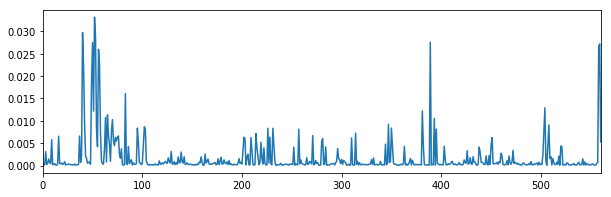

In [174]:
means.plot(legend=False,figsize=(10,3),xticks=[el for el in range(561) if not el%100])

In [175]:
means[means.argsort()[::-1]][0:10]

52     0.033130
40     0.029699
53     0.028785
389    0.027533
50     0.027431
559    0.027147
558    0.026593
56     0.025946
57     0.022666
41     0.022191
dtype: float64

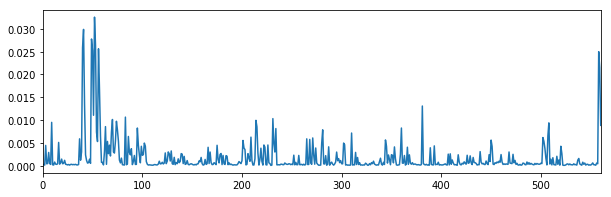

In [176]:
gkf = GroupKFold(n_splits=10)

gkf.split(X, y, groups=groups)

f = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, 
                           min_weight_fraction_leaf=0.0, max_features='auto', 
                           max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False, 
                           n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)

imps = []
mods = []
for train,test in gkf.split(X, y, groups=groups):
    f.fit(X[train],y[train])
    #print accuracy_score(f.predict(X[test]),y[test])
    imps.append(f.feature_importances_)
    #print f.feature_importances_[f.feature_importances_.argsort()[::-1]]
means = pandas.DataFrame(imps).mean()
means.plot(legend=False,figsize=(10,3),xticks=[el for el in range(561) if not el%100])

In [219]:
means[means.argsort()[::-1]][0:10].index

Int64Index([52, 41, 49, 53, 40, 56, 50, 558, 559, 57], dtype='int64')

In [220]:
X.shape

(7352, 561)

In [221]:
from pandas.tools.plotting import scatter_matrix

In [282]:
sm = pandas.DataFrame([X[:,k] for k in means[means.argsort()[::-1]][0:50].index]).T

In [304]:
import minepy

def print_stats(mine):#http://minepy.sourceforge.net/docs/1.0.0/python.html
    print "MIC", mine.mic()
    print "MAS", mine.mas()
    print "MEV", mine.mev()
    print "MCN (eps=0)", mine.mcn(0)
    print "MCN (eps=1-MIC)", mine.mcn_general()
def print_rel(x,y):
    mine = minepy.MINE(alpha=0.6,c=15)
    mine.compute_score(x,y)
    print_stats(mine)
    print "Pearson",np.corrcoef(x,y)[0,1]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1bffa4cd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x2c2f77c90>]], dtype=object)

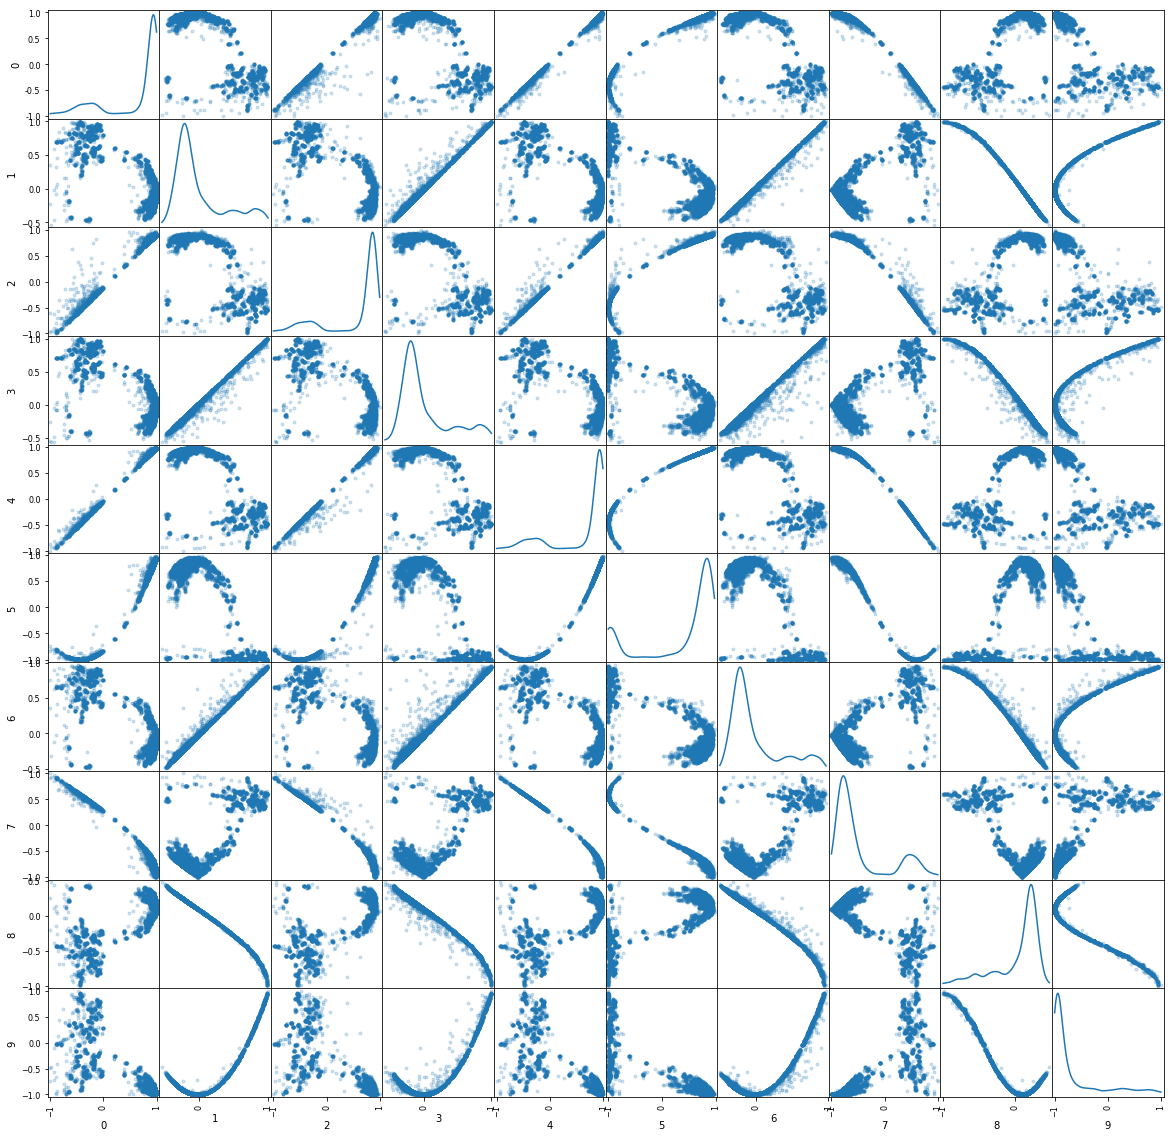

In [301]:
scatter_matrix(sm[sm.columns[0:10]],alpha=0.2,diagonal='kde',figsize=(20,20))

In [319]:
for i in range(0,10):
    for j in range(0,10):
        print "i,j",i,j
        print_rel(sm[sm.columns[i]],sm[sm.columns[j]])
        print 

i,j 0 0
MIC 1.0
MAS 0.0
MEV 1.0
MCN (eps=0) 2.0
MCN (eps=1-MIC) 2.0
Pearson 1.0

i,j 0 1
MIC 0.622566029179
MAS 0.051675582545
MEV 0.622566029179
MCN (eps=0) 7.02236781303
MCN (eps=1-MIC) 2.58496250072
Pearson -0.796982689509

i,j 0 2
MIC 0.793693583101
MAS 0.037441696995
MEV 0.793693583101
MCN (eps=0) 7.0
MCN (eps=1-MIC) 2.58496250072
Pearson 0.994365039545

i,j 0 3
MIC 0.614471193079
MAS 0.0540721373033
MEV 0.614471193079
MCN (eps=0) 6.67242534197
MCN (eps=1-MIC) 2.58496250072
Pearson -0.787620762077

i,j 0 4
MIC 0.901252790573
MAS 0.0222109018355
MEV 0.901252790573
MCN (eps=0) 7.70043971814
MCN (eps=1-MIC) 2.58496250072
Pearson 0.998964121264

i,j 0 5
MIC 0.900615880821
MAS 0.0225649342343
MEV 0.900615880821
MCN (eps=0) 7.70043971814
MCN (eps=1-MIC) 2.58496250072
Pearson 0.981259264799

i,j 0 6
MIC 0.621353015385
MAS 0.0533453945511
MEV 0.621353015385
MCN (eps=0) 7.04439411936
MCN (eps=1-MIC) 2.58496250072
Pearson -0.804289676134

i,j 0 7
MIC 0.844420191066
MAS 0.0381428146661
MEV 0

In [313]:
mine = minepy.MINE(alpha=0.6,c=15)
mine.compute_score(sm[sm.columns[1]],sm[sm.columns[0]])
print_stats(mine)

MIC 0.622566029179
MAS 0.051675582545
MEV 0.622566029179
MCN (eps=0) 7.02236781303
MCN (eps=1-MIC) 2.58496250072


In [284]:
colors = {1:'m',2:'r',3:'c',4:'b',5:'g',6:'y'}
c=pandas.DataFrame(y,columns=['color']).applymap(lambda x: colors[x])

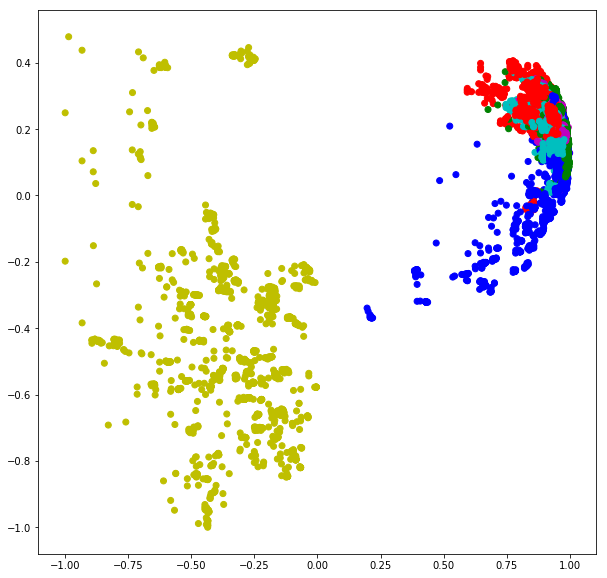

In [285]:
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(X[:,52],X[:,559],c=list(c['color']))

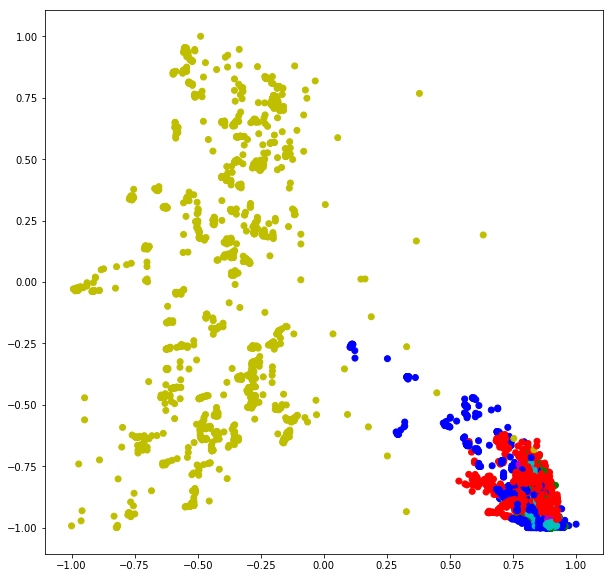

In [286]:
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(X[:,49],X[:,57],c=list(c['color']))

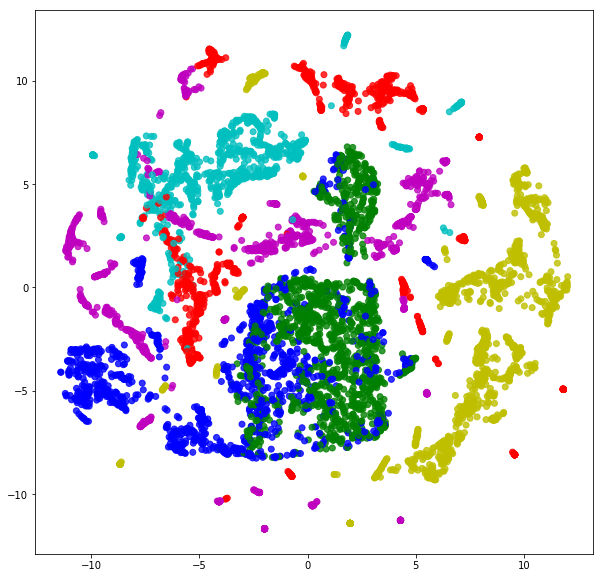

In [287]:
from sklearn.manifold import TSNE

ts= TSNE(n_components=2)

com = ts.fit_transform(sm)

fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(com[:,0],com[:,1],c=list(c['color']),alpha=0.8)

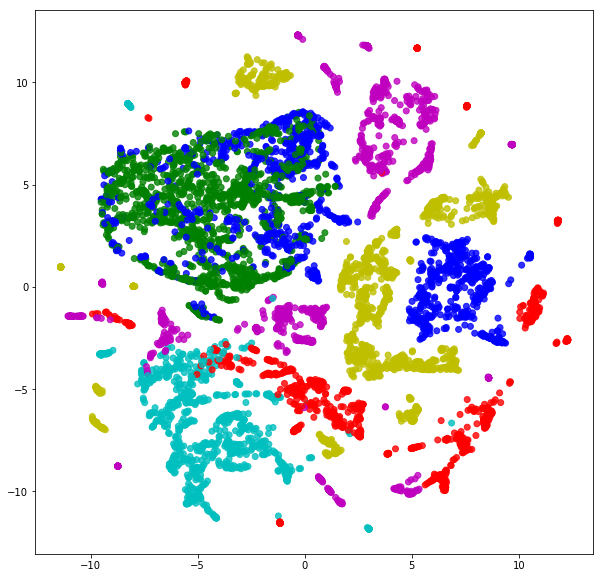

In [288]:
from sklearn.manifold import TSNE

ts= TSNE(n_components=2,metric='cosine')

com = ts.fit_transform(sm)

fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(com[:,0],com[:,1],c=list(c['color']),alpha=0.8)

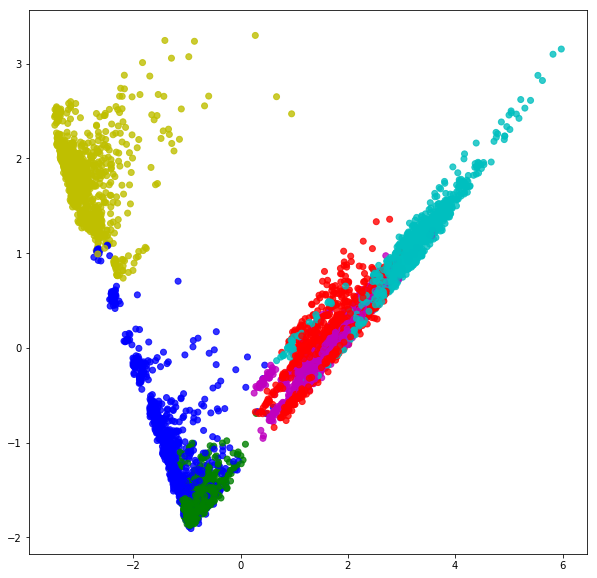

In [289]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

lin_red = pca.fit_transform(sm)

fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(lin_red[:,0],lin_red[:,1],c=list(c['color']),alpha=0.8)

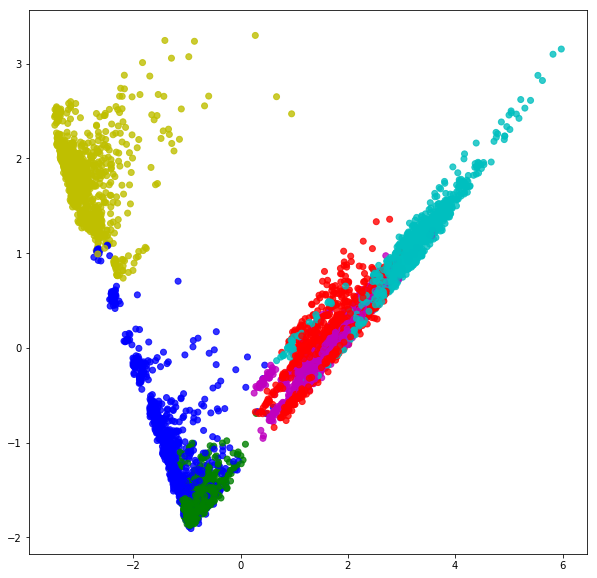

In [290]:
from sklearn.decomposition import PCA

pca=PCA(n_components=3)

lin_red = pca.fit_transform(sm)

fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(lin_red[:,0],lin_red[:,1],c=list(c['color']),alpha=0.8)

In [291]:
lin_red[0:100,:]


array([[-0.98071085, -1.76111786, -0.87458025],
       [-0.97612402, -1.69309345, -0.12913113],
       [-0.96014425, -1.7235868 ,  0.00330799],
       [-0.93286341, -1.64857165,  0.45447829],
       [-0.99352279, -1.62884438,  0.77442501],
       [-1.00713007, -1.62763791,  0.88618967],
       [-0.97344266, -1.628107  ,  0.69803465],
       [-0.96475015, -1.6301672 ,  0.62263511],
       [-0.97732844, -1.68721626,  0.36857765],
       [-0.9309128 , -1.67025699,  0.35216399],
       [-0.94362915, -1.61860453,  0.74456726],
       [-0.99831693, -1.6288991 ,  0.95555413],
       [-1.04825536, -1.65441426,  0.99738358],
       [-1.03116299, -1.66734089,  0.90879554],
       [-0.80846602, -1.73089556, -1.16380599],
       [-0.99492402, -1.86069631, -0.97246542],
       [-1.02102826, -1.82138541, -0.32001879],
       [-1.00015323, -1.71795555,  0.39495425],
       [-1.02027753, -1.68706101,  0.63832709],
       [-1.02744258, -1.68120081,  0.70811497],
       [-0.97312675, -1.61638945,  1.059

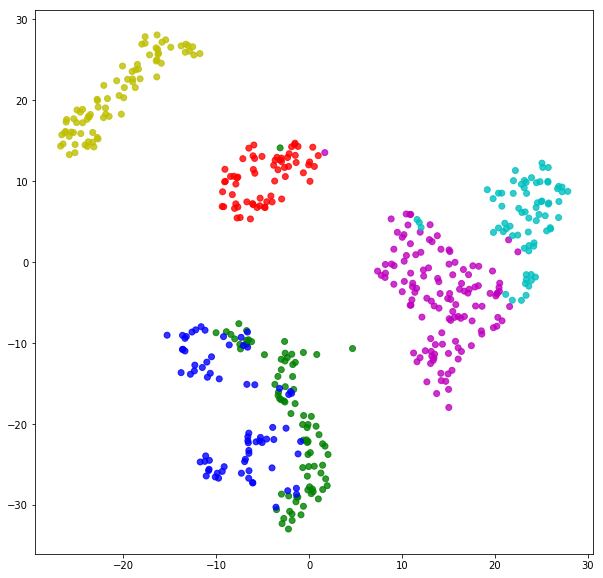

In [292]:
from sklearn.manifold import TSNE

ts= TSNE(n_components=2,init='pca',learning_rate=1000)

com = ts.fit_transform(lin_red[0:500,:])

fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(com[:,0],com[:,1],c=list(c['color'])[0:499],alpha=0.8)

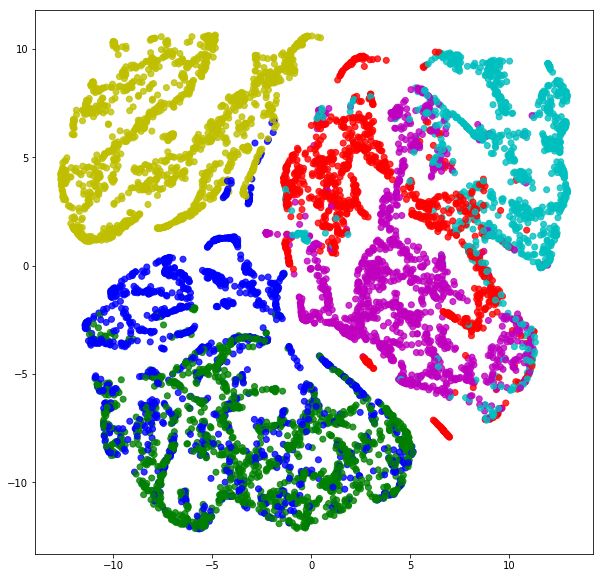

In [293]:
from sklearn.manifold import TSNE

ts= TSNE(n_components=2,init='pca',learning_rate=1000)

com = ts.fit_transform(lin_red)

fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(com[:,0],com[:,1],c=list(c['color']),alpha=0.8)

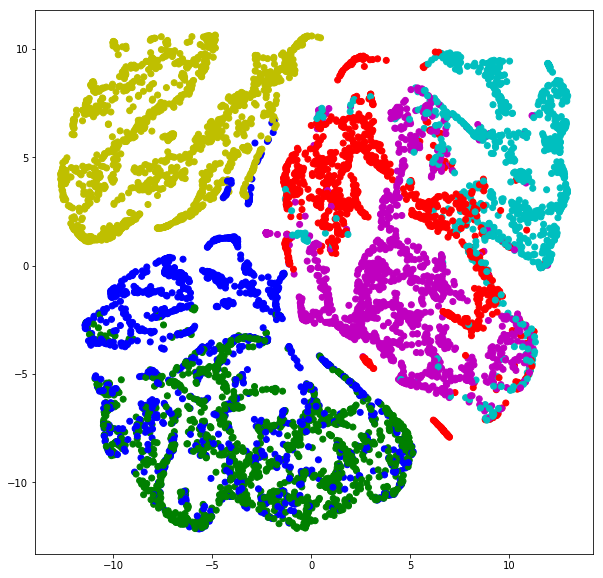

In [294]:
fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(com[:,0],com[:,1],c=list(c['color']))

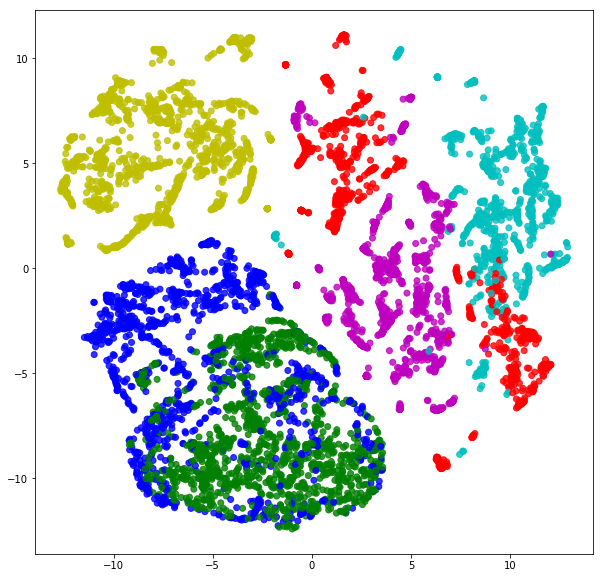

In [295]:
from sklearn.manifold import TSNE

ts= TSNE(n_components=2,metric='correlation',init='pca')

com = ts.fit_transform(sm)

fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(com[:,0],com[:,1],c=list(c['color']),alpha=0.8)

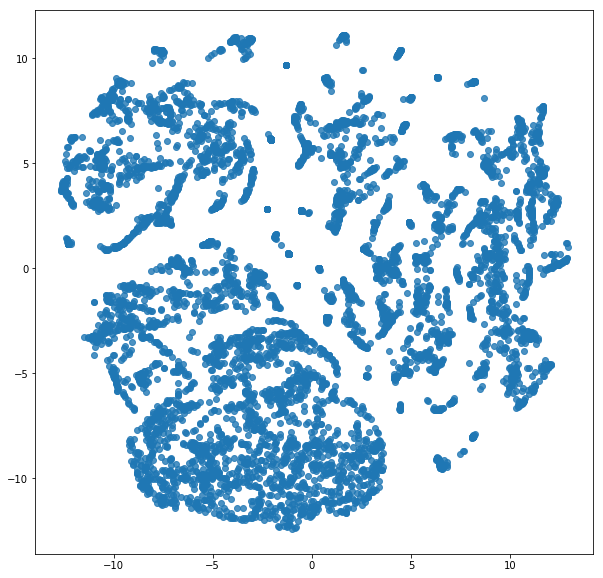

In [296]:
fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(com[:,0],com[:,1],alpha=0.8)